In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
pokGo = pd.read_csv('300k.csv')
pokGo.head(5)

/Applications/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2728: DtypeWarning: Columns (49) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,pokemonId,latitude,longitude,appearedLocalTime,_id,cellId_90m,cellId_180m,cellId_370m,cellId_730m,cellId_1460m,...,cooc_143,cooc_144,cooc_145,cooc_146,cooc_147,cooc_148,cooc_149,cooc_150,cooc_151,class
0,16,20.525745,-97.460829,2016-09-08T03:57:45,NTgxMDkzOTk4MTM5MjUwMjIzNw==,9645139108510564000,9645139108711890000,9645139108443455000,9645139109517197000,9645139113812165000,...,False,False,False,False,False,False,False,False,False,16
1,133,20.523695,-97.461167,2016-09-08T03:57:37,OTQ1NDgzODc1MjM3NDEzMTI2MQ==,9645139109852742000,9645139109785633000,9645139110590940000,9645139109517197000,9645139113812165000,...,False,False,False,False,False,False,False,False,False,133
2,16,38.903590,-77.199780,2016-09-08T03:57:25,NTQ0OTQ0NDA1Nzg2ODg3OTg2OQ==,9923201472785285000,9923201472986612000,9923201473791918000,9923201477013144000,9923201481308110000,...,False,False,False,False,False,False,False,False,False,16
3,13,47.665903,-122.312561,2016-09-08T03:56:22,NTU2MTU1NDM4NzA2MDk1MDcxNw==,6093392705025474600,6093392705092583400,6093392705897889800,6093392702676664300,6093392715561566200,...,False,False,False,False,False,False,False,False,False,13
4,133,47.666454,-122.311628,2016-09-08T03:56:08,MTY2ODg4MTAzMTczMDE0MTUwNTM=,6093392707709829100,6093392707776938000,6093392708045373400,6093392711266598900,6093392715561566200,...,False,False,False,False,False,False,False,False,False,133


In [5]:
pokGo.columns

Index(['pokemonId', 'latitude', 'longitude', 'appearedLocalTime', '_id',
       'cellId_90m', 'cellId_180m', 'cellId_370m', 'cellId_730m',
       'cellId_1460m',
       ...
       'cooc_143', 'cooc_144', 'cooc_145', 'cooc_146', 'cooc_147', 'cooc_148',
       'cooc_149', 'cooc_150', 'cooc_151', 'class'],
      dtype='object', length=208)

# Pokemon Go spawns on August 2016

In [47]:
pokGo_mini = pokGo[['pokemonId', 'latitude', 'longitude', 'appearedLocalTime', 'appearedTimeOfDay', 'appearedHour',
              'appearedMinute', 'appearedDayOfWeek', 'appearedDay',
                    'closeToWater', 'city', 'continent', 'weather', 'temperature', 'windSpeed', 'windBearing',
                    'pressure', 'population_density']]
pokGo_mini.head(5)

,pokemonId,latitude,longitude,appearedLocalTime,appearedTimeOfDay,appearedHour,appearedMinute,appearedDayOfWeek,appearedDay,closeToWater,city,continent,weather,temperature,windSpeed,windBearing,pressure,population_density
0,16,20.525745,-97.460829,2016-09-08T03:57:45,night,5,57,dummy_day,8,False,Mexico_City,America,Foggy,25.5,4.79,269,1018.02,2431.2341
1,133,20.523695,-97.461167,2016-09-08T03:57:37,night,5,57,dummy_day,8,False,Mexico_City,America,Foggy,25.5,4.79,269,1018.02,2431.2341
2,16,38.903590,-77.199780,2016-09-08T03:57:25,night,5,57,dummy_day,8,False,New_York,America,Clear,24.2,4.29,218,1015.29,761.8856
3,13,47.665903,-122.312561,2016-09-08T03:56:22,night,5,56,dummy_day,8,True,Los_Angeles,America,PartlyCloudy,15.6,5.84,160,1020.52,4842.1626
4,133,47.666454,-122.311628,2016-09-08T03:56:08,night,5,56,dummy_day,8,True,Los_Angeles,America,PartlyCloudy,15.6,5.84,160,1020.52,4842.1626


In [46]:
pokGo_mini['appearedDayOfWeek'].replace('dummy_day', 'Monday', inplace=True)
pokGo_mini['appearedDay'].replace(8, 1, inplace=True)

/Applications/anaconda3/lib/python3.6/site-packages/pandas/core/generic.py:5890: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)


In [49]:
pokemon = ['Bulbasaur', 'Ivysaur', 'Venusaur', 'Charmander', 'Charmeleon', 'Charizard', 'Squirtle', 'Wartortle',
           'Blastoise', 'Caterpie', 'Metapod', 'Butterfree', 'Weedle', 'Kakuna', 'Beedrill', 'Pidgey', 'Pidgeotto',
           'Pidgeot', 'Rattata', 'Raticate', 'Spearow', 'Fearow', 'Ekans', 'Arbok', 'Pikachu', 'Raichu', 'Sandshrew',
           'Sandslash', 'Nidoran_F', 'Nidorina', 'Nidoqueen', 'Nidoran_M', 'Nidorino', 'Nidoking', 'Clefairy',
           'Clefable', 'Vulpix', 'Ninetales', 'Jigglypuff', 'Wigglytuff', 'Zubat', 'Golbat', 'Oddish', 'Gloom',
           'Vileplume', 'Paras', 'Parasect', 'Venonat', 'Venomoth', 'Diglett', 'Dugtrio', 'Meowth', 'Persian',
           'Psyduck', 'Golduck', 'Mankey', 'Primeape', 'Growlithe', 'Arcanine', 'Poliwag', 'Poliwhirl', 'Poliwrath',
           'Abra', 'Kadabra', 'Alakazam', 'Machop', 'Machoke', 'Machamp', 'Bellsprout', 'Weepinbell', 'Victreebel',
           'Tentacool', 'Tentacruel', 'Geodude', 'Graveler', 'Golem', 'Ponyta', 'Rapidash', 'Slowpoke', 'Slowbro',
           'Magnemite', 'Magneton', 'Farfetchd', 'Doduo', 'Dodrio', 'Seel', 'Dewgong', 'Grimer', 'Muk', 'Shellder',
           'Cloyster', 'Gastly', 'Haunter', 'Gengar', 'Onix', 'Drowzee', 'Hypno', 'Krabby', 'Kingler', 'Voltorb',
           'Electrode', 'Exeggcute', 'Exeggutor', 'Cubone', 'Marowak', 'Hitmonlee', 'Hitmonchan', 'Lickitung',
           'Koffing', 'Weezing', 'Rhyhorn', 'Rhydon', 'Chansey', 'Tangela', 'Kangaskhan', 'Horsea', 'Seadra',
           'Goldeen', 'Seaking', 'Staryu', 'Starmie', 'Mr. Mime', 'Scyther', 'Jynx', 'Electabuzz', 'Magmar', 'Pinsir',
           'Tauros', 'Magikarp', 'Gyarados', 'Lapras', 'Ditto', 'Eevee', 'Vaporeon', 'Jolteon', 'Flareon', 'Porygon',
           'Omanyte', 'Omastar', 'Kabuto', 'Kabutops', 'Aerodactyl', 'Snorlax', 'Articuno', 'Zapdos', 'Moltres',
           'Dratini', 'Dragonair', 'Dragonite', 'Mewtwo', 'Mew']
name_id_map = {}
for i in range(len(pokemon)):
    name_id_map[i+1] = pokemon[i]

In [65]:
freq = pokGo_mini.groupby('pokemonId').size().sort_values(ascending=False)
freq.rename(name_id_map, inplace=True)

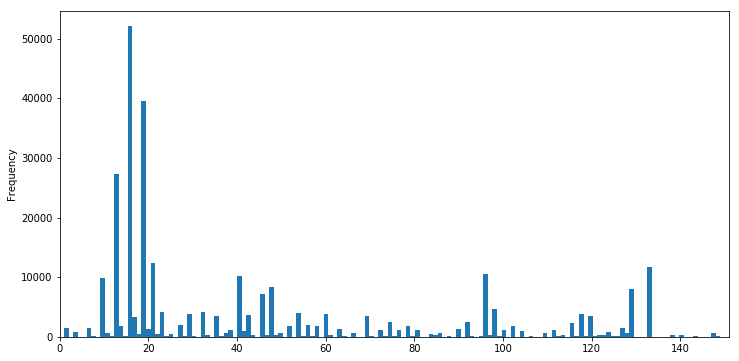

In [73]:
h = pokGo_mini['pokemonId'].plot.hist(bins=len(freq), figsize=(12, 6), xlim=(0, 151))